In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
online_retail_df = pd.read_excel('data\online_retail_clean.xlsx', index_col=0)

In [3]:
online_retail_df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNum
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,536365
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,536365
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365


In [4]:
online_retail_df.columns

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'InvoiceNum'],
      dtype='object')

In [5]:
online_retail_df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNum
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,536365
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,536365
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365


In [6]:
online_retail_df.tail()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNum
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,581587
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,581587
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,581587
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,581587
541908,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,581587


In [7]:
# earliest and latest InvoiceDate in the dateset
print('Min:{}; Max:{}'.format(min(online_retail_df.InvoiceDate.dt.date), max(online_retail_df.InvoiceDate.dt.date)))

Min:2010-12-01; Max:2011-12-09


In [8]:
uk_online_retail_df = pd.read_excel('data\\uk_online_retail_clean.xlsx', index_col = 0)

In [9]:
uk_online_retail_df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNum
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,536365
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,536365
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365


In [10]:
online_retail_df.shape, uk_online_retail_df.shape

((397884, 8), (354321, 8))

In [11]:
online_retail_df.dtypes

StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
InvoiceNum              int64
dtype: object

In [12]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    397884 non-null  object        
 1   Description  397884 non-null  object        
 2   Quantity     397884 non-null  int64         
 3   InvoiceDate  397884 non-null  datetime64[ns]
 4   UnitPrice    397884 non-null  float64       
 5   CustomerID   397884 non-null  int64         
 6   Country      397884 non-null  object        
 7   InvoiceNum   397884 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.3+ MB


In [13]:
# number of reacords assocaited with each country
online_retail_df.Country.value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [14]:
# Order counts per country
order_counts_country = online_retail_df.groupby(by=['Country'])['InvoiceNum'].nunique().sort_values()
order_counts_country

Country
Lebanon                     1
Brazil                      1
RSA                         1
Saudi Arabia                1
Bahrain                     2
Czech Republic              2
United Arab Emirates        3
European Community          4
Lithuania                   4
Israel                      5
Greece                      5
Malta                       5
USA                         5
Canada                      6
Singapore                   7
Iceland                     7
Unspecified                 8
Cyprus                     16
Austria                    17
Denmark                    18
Poland                     19
Japan                      19
Channel Islands            26
Sweden                     36
Norway                     36
Italy                      38
Finland                    41
Switzerland                51
Portugal                   57
Australia                  57
Spain                      90
Netherlands                94
Belgium                    98
EI

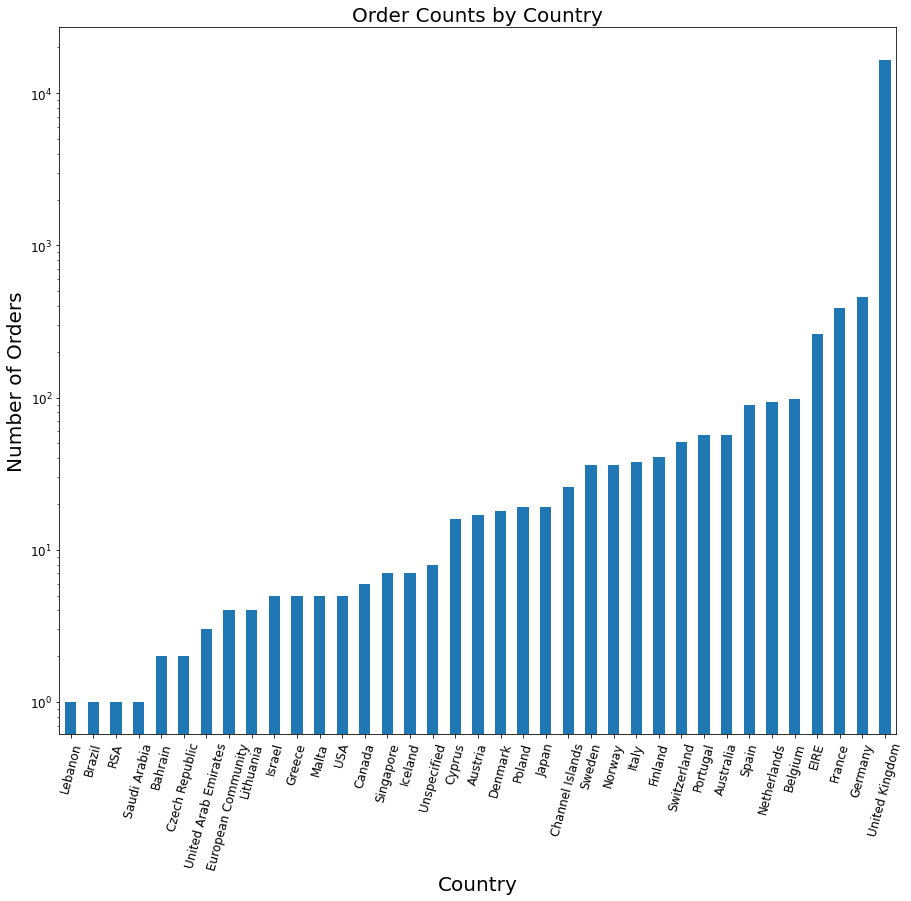

In [15]:
order_counts_country.plot(kind='bar', figsize=(15, 13), rot = 75)
plt.yscale('log')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Order Counts by Country', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Number of Orders', fontsize = 20)
plt.show()

In [16]:
#customer counts per country
customer_counts_country = online_retail_df.groupby(by=['Country'])['CustomerID'].nunique().sort_values()
customer_counts_country

Country
European Community         1
Lebanon                    1
Iceland                    1
RSA                        1
Brazil                     1
Saudi Arabia               1
Lithuania                  1
Singapore                  1
Czech Republic             1
Malta                      2
Bahrain                    2
United Arab Emirates       2
EIRE                       3
Israel                     3
Canada                     4
USA                        4
Greece                     4
Unspecified                4
Poland                     6
Sweden                     8
Japan                      8
Cyprus                     8
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Norway                    10
Austria                   11
Finland                   12
Italy                     14
Portugal                  19
Switzerland               21
Belgium                   25
Spain                     30
France

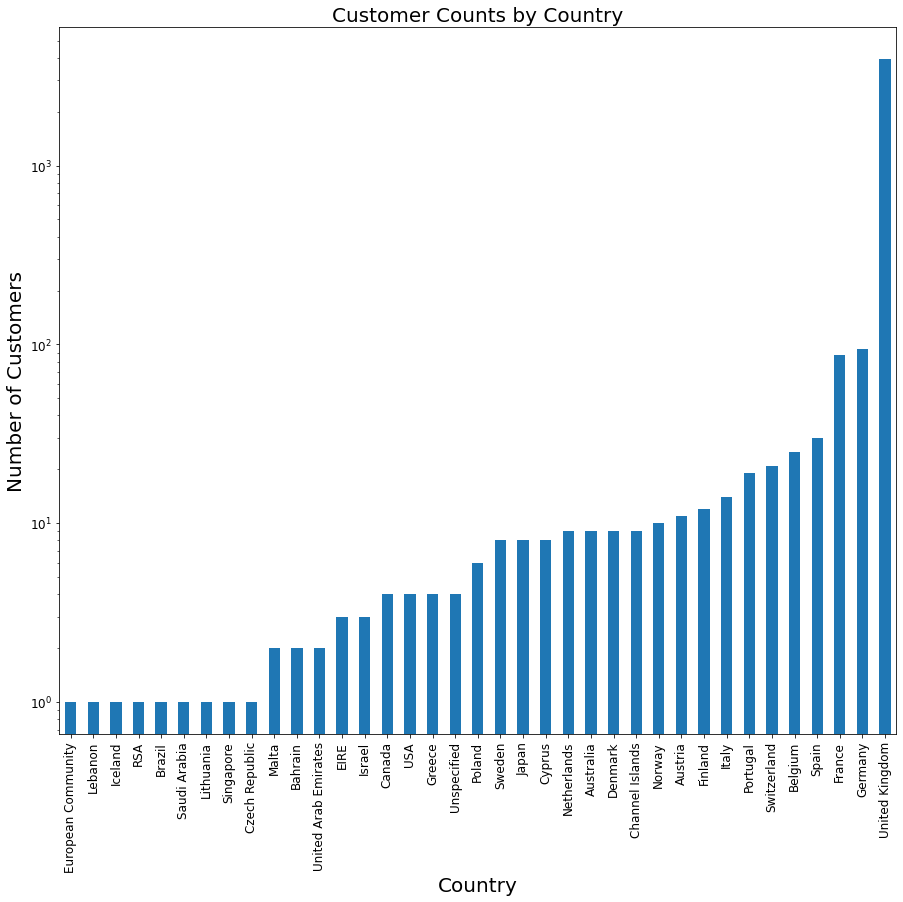

In [17]:

customer_counts_country.plot(kind='bar', figsize=(15, 13), rot = 90)
plt.yscale('log')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Customer Counts by Country', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)
plt.show()

In [18]:
# number of customers in UK
uk_online_retail_df['CustomerID'].nunique()

3920

In [19]:
# customers with the top 5 number of orders in UK
uk_online_retail_df.groupby(by=['CustomerID'])['InvoiceNum'].nunique().sort_values(ascending = False).head()

CustomerID
12748    209
17841    124
13089     97
14606     93
15311     91
Name: InvoiceNum, dtype: int64

In [20]:
uk_online_retail_df['Amount'] = uk_online_retail_df['Quantity']*uk_online_retail_df['UnitPrice']
uk_online_retail_df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNum,Amount
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,536365,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,536365,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365,20.34


In [21]:
#customers with the highest total spending amounts in UK
uk_online_retail_df.groupby(by=['CustomerID'])['Amount'].sum().sort_values(ascending = False).head()

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: Amount, dtype: float64

In [22]:
uk_online_retail_df['OrderAmount'] = uk_online_retail_df.groupby(by=['CustomerID', 'InvoiceNum'])['Amount'].transform('sum')
uk_online_retail_df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNum,Amount,OrderAmount
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,536365,15.30,139.12
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365,20.34,139.12
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,536365,22.00,139.12
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365,20.34,139.12
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,536365,20.34,139.12
...,...,...,...,...,...,...,...,...,...,...
541889,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,581585,23.40,329.05
541890,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,581586,23.60,339.20
541891,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,581586,30.00,339.20
541892,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,581586,214.80,339.20


In [23]:
new_uk_online_retail_df = uk_online_retail_df[['CustomerID', 'InvoiceNum', 'InvoiceDate', 'OrderAmount']].drop_duplicates()
new_uk_online_retail_df.head()

,CustomerID,InvoiceNum,InvoiceDate,OrderAmount
0,17850,536365,2010-12-01 08:26:00.000000,139.12
7,17850,536366,2010-12-01 08:28:00.000000,22.20
9,13047,536367,2010-12-01 08:33:59.999999,278.73
21,13047,536368,2010-12-01 08:33:59.999999,70.05
25,13047,536369,2010-12-01 08:35:00.000000,17.85


In [24]:
new_uk_online_retail_df['InvoiceDay'] = new_uk_online_retail_df['InvoiceDate'].dt.date
new_uk_online_retail_df.head()

,CustomerID,InvoiceNum,InvoiceDate,OrderAmount,InvoiceDay
0,17850,536365,2010-12-01 08:26:00.000000,139.12,2010-12-01
7,17850,536366,2010-12-01 08:28:00.000000,22.20,2010-12-01
9,13047,536367,2010-12-01 08:33:59.999999,278.73,2010-12-01
21,13047,536368,2010-12-01 08:33:59.999999,70.05,2010-12-01
25,13047,536369,2010-12-01 08:35:00.000000,17.85,2010-12-01


In [25]:
new_uk_online_retail_df['DayOrderAmount'] = new_uk_online_retail_df.groupby(by=['CustomerID', 'InvoiceDay'])['OrderAmount'].transform('sum')
new_uk_online_retail_df.head()

,CustomerID,InvoiceNum,InvoiceDate,OrderAmount,InvoiceDay,DayOrderAmount
0,17850,536365,2010-12-01 08:26:00.000000,139.12,2010-12-01,1499.34
7,17850,536366,2010-12-01 08:28:00.000000,22.20,2010-12-01,1499.34
9,13047,536367,2010-12-01 08:33:59.999999,278.73,2010-12-01,366.63
21,13047,536368,2010-12-01 08:33:59.999999,70.05,2010-12-01,366.63
25,13047,536369,2010-12-01 08:35:00.000000,17.85,2010-12-01,366.63


In [26]:
new_uk_online_retail_df['DayOrderCount']=new_uk_online_retail_df.groupby(['CustomerID', 'InvoiceDay'])['InvoiceNum'].transform('count')
new_uk_online_retail_df.head()

,CustomerID,InvoiceNum,InvoiceDate,OrderAmount,InvoiceDay,DayOrderAmount,DayOrderCount
0,17850,536365,2010-12-01 08:26:00.000000,139.12,2010-12-01,1499.34,10
7,17850,536366,2010-12-01 08:28:00.000000,22.20,2010-12-01,1499.34,10
9,13047,536367,2010-12-01 08:33:59.999999,278.73,2010-12-01,366.63,3
21,13047,536368,2010-12-01 08:33:59.999999,70.05,2010-12-01,366.63,3
25,13047,536369,2010-12-01 08:35:00.000000,17.85,2010-12-01,366.63,3


In [27]:
#check DayOrderCount with CustomerID 17850 for day 2010-12-01
new_uk_online_retail_df[new_uk_online_retail_df.CustomerID==17850].head(50)

,CustomerID,InvoiceNum,InvoiceDate,OrderAmount,InvoiceDay,DayOrderAmount,DayOrderCount
0,17850,536365,2010-12-01 08:26:00.000000,139.12,2010-12-01,1499.34,10
7,17850,536366,2010-12-01 08:28:00.000000,22.20,2010-12-01,1499.34,10
47,17850,536372,2010-12-01 09:01:00.000000,22.20,2010-12-01,1499.34,10
49,17850,536373,2010-12-01 09:02:00.000000,259.86,2010-12-01,1499.34,10
66,17850,536375,2010-12-01 09:32:00.000000,259.86,2010-12-01,1499.34,10
84,17850,536377,2010-12-01 09:34:00.000000,22.20,2010-12-01,1499.34,10
278,17850,536396,2010-12-01 10:51:00.000000,376.36,2010-12-01,1499.34,10
315,17850,536399,2010-12-01 10:52:00.000000,22.20,2010-12-01,1499.34,10
416,17850,536406,2010-12-01 11:33:00.000000,353.14,2010-12-01,1499.34,10
433,17850,536407,2010-12-01 11:33:59.999999,22.20,2010-12-01,1499.34,10


In [28]:
new_uk_online_retail_df.drop(['InvoiceNum', 'OrderAmount', 'InvoiceDate'], axis = 1, inplace=True)
new_uk_online_retail_df.head()

,CustomerID,InvoiceDay,DayOrderAmount,DayOrderCount
0,17850,2010-12-01,1499.34,10
7,17850,2010-12-01,1499.34,10
9,13047,2010-12-01,366.63,3
21,13047,2010-12-01,366.63,3
25,13047,2010-12-01,366.63,3


In [29]:
new_uk_online_retail_df.drop_duplicates(inplace=True)
new_uk_online_retail_df.head()

,CustomerID,InvoiceDay,DayOrderAmount,DayOrderCount
0,17850,2010-12-01,1499.34,10
9,13047,2010-12-01,366.63,3
46,13748,2010-12-01,204.00,1
65,15100,2010-12-01,350.40,1
82,15291,2010-12-01,328.80,1


In [30]:
# days with the greatest number of orders in UK
new_uk_online_retail_df.groupby('InvoiceDay')['DayOrderCount'].sum().sort_values(ascending=False).head()

InvoiceDay
2010-12-02    135
2011-11-22    117
2011-11-23    116
2010-12-01    115
2011-11-29    115
Name: DayOrderCount, dtype: int64

In [31]:
#days with the most transaction amount in UK
new_uk_online_retail_df.groupby('InvoiceDay')['DayOrderAmount'].sum().sort_values(ascending=False).head()

InvoiceDay
2011-12-09    179562.78
2011-09-20    100475.23
2011-01-18     84038.34
2011-09-15     67891.44
2011-10-03     61917.55
Name: DayOrderAmount, dtype: float64

**Calculate Retention rate of customers in UK**

In [32]:
def set_date(date):
    return datetime(date.year, date.month, 1) 

In [33]:
new_uk_online_retail_df['InvoiceMonth'] = new_uk_online_retail_df['InvoiceDay'].apply(set_date)
new_uk_online_retail_df.head()

,CustomerID,InvoiceDay,DayOrderAmount,DayOrderCount,InvoiceMonth
0,17850,2010-12-01,1499.34,10,2010-12-01
9,13047,2010-12-01,366.63,3,2010-12-01
46,13748,2010-12-01,204.00,1,2010-12-01
65,15100,2010-12-01,350.40,1,2010-12-01
82,15291,2010-12-01,328.80,1,2010-12-01


In [34]:
new_uk_online_retail_df['CohortMonth']=new_uk_online_retail_df.groupby('CustomerID')['InvoiceMonth'].transform('min')
new_uk_online_retail_df.head()

,CustomerID,InvoiceDay,DayOrderAmount,DayOrderCount,InvoiceMonth,CohortMonth
0,17850,2010-12-01,1499.34,10,2010-12-01,2010-12-01
9,13047,2010-12-01,366.63,3,2010-12-01,2010-12-01
46,13748,2010-12-01,204.00,1,2010-12-01,2010-12-01
65,15100,2010-12-01,350.40,1,2010-12-01,2010-12-01
82,15291,2010-12-01,328.80,1,2010-12-01,2010-12-01


In [35]:
#Calculate monthes between InvoiceMonth and CohortMonth
years_diff = new_uk_online_retail_df['InvoiceMonth'].dt.year-new_uk_online_retail_df['CohortMonth'].dt.year 
month_diff = new_uk_online_retail_df['InvoiceMonth'].dt.month-new_uk_online_retail_df['CohortMonth'].dt.month
new_uk_online_retail_df['CohortIndex']=years_diff*12 + month_diff + 1
new_uk_online_retail_df.head()

,CustomerID,InvoiceDay,DayOrderAmount,DayOrderCount,InvoiceMonth,CohortMonth,CohortIndex
0,17850,2010-12-01,1499.34,10,2010-12-01,2010-12-01,1
9,13047,2010-12-01,366.63,3,2010-12-01,2010-12-01,1
46,13748,2010-12-01,204.00,1,2010-12-01,2010-12-01,1
65,15100,2010-12-01,350.40,1,2010-12-01,2010-12-01,1
82,15291,2010-12-01,328.80,1,2010-12-01,2010-12-01,1


In [36]:
new_uk_online_retail_df.tail()

,CustomerID,InvoiceDay,DayOrderAmount,DayOrderCount,InvoiceMonth,CohortMonth,CohortIndex
541806,17581,2011-12-09,984.68,3,2011-12-01,2010-12-01,13
541836,12748,2011-12-09,94.11,1,2011-12-01,2010-12-01,13
541865,13777,2011-12-09,265.24,2,2011-12-01,2010-12-01,13
541869,15804,2011-12-09,329.05,1,2011-12-01,2011-05-01,8
541890,13113,2011-12-09,339.20,1,2011-12-01,2010-12-01,13


In [37]:
#count monthly active customer for each cohort
cohort_customer_count = new_uk_online_retail_df.groupby(by=['CohortMonth', 'CohortIndex'])['CustomerID'].nunique()

In [38]:
type(cohort_customer_count)

pandas.core.series.Series

In [39]:
cohort_customer_count.head()

CohortMonth  CohortIndex
2010-12-01   1              815
             2              289
             3              263
             4              304
             5              293
Name: CustomerID, dtype: int64

In [40]:
cohort_customer_count=cohort_customer_count.reset_index()
type(cohort_customer_count)

pandas.core.frame.DataFrame

In [41]:
cohort_customer_count.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,815
1,2010-12-01,2,289
2,2010-12-01,3,263
3,2010-12-01,4,304
4,2010-12-01,5,293


In [42]:
cohort_customer_count['CohortMonth']=cohort_customer_count['CohortMonth'].dt.strftime('%Y-%m')
cohort_customer_count.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12,1,815
1,2010-12,2,289
2,2010-12,3,263
3,2010-12,4,304
4,2010-12,5,293


In [43]:
cohort_customer_count_pivot = cohort_customer_count.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_customer_count_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,815.0,289.0,263.0,304.0,293.0,323.0,291.0,278.0,289.0,325.0,299.0,405.0,218.0
2011-01,358.0,76.0,93.0,84.0,119.0,99.0,90.0,87.0,108.0,117.0,127.0,43.0,NaN
2011-02,340.0,64.0,66.0,97.0,98.0,86.0,87.0,96.0,90.0,104.0,25.0,NaN,NaN
2011-03,419.0,64.0,109.0,83.0,94.0,69.0,111.0,96.0,119.0,38.0,NaN,NaN,NaN
2011-04,277.0,58.0,56.0,60.0,56.0,61.0,61.0,73.0,20.0,NaN,NaN,NaN,NaN
2011-05,256.0,48.0,44.0,44.0,53.0,58.0,68.0,23.0,NaN,NaN,NaN,NaN,NaN
2011-06,214.0,38.0,31.0,51.0,51.0,69.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,169.0,30.0,33.0,39.0,47.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,141.0,32.0,32.0,34.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
cohort_initial = cohort_customer_count_pivot.iloc[:,0]

In [45]:
cohort_initial

CohortMonth
2010-12    815.0
2011-01    358.0
2011-02    340.0
2011-03    419.0
2011-04    277.0
2011-05    256.0
2011-06    214.0
2011-07    169.0
2011-08    141.0
2011-09    276.0
2011-10    324.0
2011-11    297.0
2011-12     34.0
Name: 1, dtype: float64

In [46]:
retention_rate =  cohort_customer_count_pivot.divide(cohort_initial, axis=0)
retention_rate

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.354601,0.322699,0.373006,0.359509,0.396319,0.357055,0.341104,0.354601,0.398773,0.366871,0.496933,0.267485
2011-01,1.0,0.212291,0.259777,0.234637,0.332402,0.276536,0.251397,0.243017,0.301676,0.326816,0.354749,0.120112,NaN
2011-02,1.0,0.188235,0.194118,0.285294,0.288235,0.252941,0.255882,0.282353,0.264706,0.305882,0.073529,NaN,NaN
2011-03,1.0,0.152745,0.260143,0.198091,0.224344,0.164678,0.264916,0.229117,0.284010,0.090692,NaN,NaN,NaN
2011-04,1.0,0.209386,0.202166,0.216606,0.202166,0.220217,0.220217,0.263538,0.072202,NaN,NaN,NaN,NaN
2011-05,1.0,0.187500,0.171875,0.171875,0.207031,0.226562,0.265625,0.089844,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.177570,0.144860,0.238318,0.238318,0.322430,0.098131,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.177515,0.195266,0.230769,0.278107,0.106509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.226950,0.226950,0.241135,0.120567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
retention_rate.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,35.5,32.3,37.3,36.0,39.6,35.7,34.1,35.5,39.9,36.7,49.7,26.7
2011-01,100.0,21.2,26.0,23.5,33.2,27.7,25.1,24.3,30.2,32.7,35.5,12.0,NaN
2011-02,100.0,18.8,19.4,28.5,28.8,25.3,25.6,28.2,26.5,30.6,7.4,NaN,NaN
2011-03,100.0,15.3,26.0,19.8,22.4,16.5,26.5,22.9,28.4,9.1,NaN,NaN,NaN
2011-04,100.0,20.9,20.2,21.7,20.2,22.0,22.0,26.4,7.2,NaN,NaN,NaN,NaN
2011-05,100.0,18.8,17.2,17.2,20.7,22.7,26.6,9.0,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,17.8,14.5,23.8,23.8,32.2,9.8,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,17.8,19.5,23.1,27.8,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,22.7,22.7,24.1,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


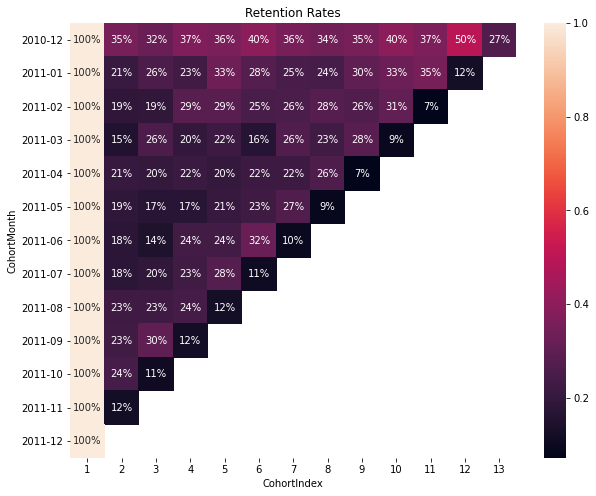

In [48]:
# heatmap for retention_rate
plt.figure(figsize=(10,8))
sns.heatmap(data=retention_rate, fmt='.0%', annot=True)
plt.title('Retention Rates')
plt.show()

In [49]:
new_uk_online_retail_df.to_excel('data\\new_uk_online_retail.xlsx')